In [1]:
import cooler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("results/0B.csv")

In [3]:
X

,Replica,Class,Dim,Birth,Death,Lifetime,Numvert,Range,Vertices
0,0B,1,1,0.353950,0.354069,0.000119,4,4,"[3, 4, 6, 7]"
1,0B,2,1,0.377191,0.389900,0.012709,4,3,"[15089, 15090, 15091, 15092]"
2,0B,3,1,0.378701,0.382838,0.004137,4,3,"[13254, 13255, 13256, 13257]"
3,0B,4,1,0.383301,0.416386,0.033085,5,17,"[15096, 15097, 15111, 15112, 15113]"
4,0B,5,1,0.387554,0.394322,0.006768,4,3,"[13424, 13425, 13426, 13427]"
...,...,...,...,...,...,...,...,...,...
4454,0B,1013,2,0.484302,inf,inf,21,15138,"[10, 15090, 15091, 15095, 15098, 15103, 15105,..."
4455,0B,1014,2,0.478777,inf,inf,14,28,"[13122, 13124, 13126, 13127, 13128, 13130, 131..."
4456,0B,1015,2,0.474157,inf,inf,19,15129,"[10, 11, 12, 15089, 15090, 15096, 15097, 15098..."
4457,0B,1016,2,0.472302,inf,inf,8,45,"[15103, 15104, 15108, 15118, 15119, 15146, 151..."


In [4]:
X[X.Range > 5 ].sort_values("Numvert")

,Replica,Class,Dim,Birth,Death,Lifetime,Numvert,Range,Vertices
396,0B,397,1,0.445344,0.446596,0.001252,4,9,"[12475, 12476, 12483, 12484]"
1704,0B,1705,1,0.438577,0.442822,0.004245,4,11,"[1867, 1868, 1877, 1878]"
1694,0B,1695,1,0.438361,0.445360,0.006999,4,10,"[13333, 13334, 13342, 13343]"
1679,0B,1680,1,0.438087,0.448759,0.010671,4,6,"[1055, 1056, 1060, 1061]"
414,0B,415,1,0.446365,0.453794,0.007429,4,12,"[7331, 7332, 7342, 7343]"
...,...,...,...,...,...,...,...,...,...
3372,0B,3373,1,0.478634,inf,inf,1586,11078,"[4068, 4069, 4070, 4071, 4072, 4073, 4074, 407..."
3270,0B,3271,1,0.496980,inf,inf,1604,14966,"[167, 169, 170, 171, 172, 173, 174, 183, 184, ..."
3397,0B,3398,1,0.471638,inf,inf,2028,6339,"[8794, 8795, 8796, 8797, 8798, 8799, 8800, 880..."
3407,0B,3408,1,0.463379,inf,inf,2110,9670,"[5463, 5464, 5465, 5466, 5467, 5468, 5469, 547..."


Draw loop at Hi-C Map

In [14]:
c = cooler.Cooler("/home/a.kuznetsov/Data/0B.dicty_withcontigs.mapq_30.100.mcool::resolutions/2000")
bal = c.matrix(balance=True)[:, :]
bal

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan, 4.12489196,
        0.81525383],
       [       nan,        nan,        nan, ...,        nan, 0.81525383,
        0.77965126]])

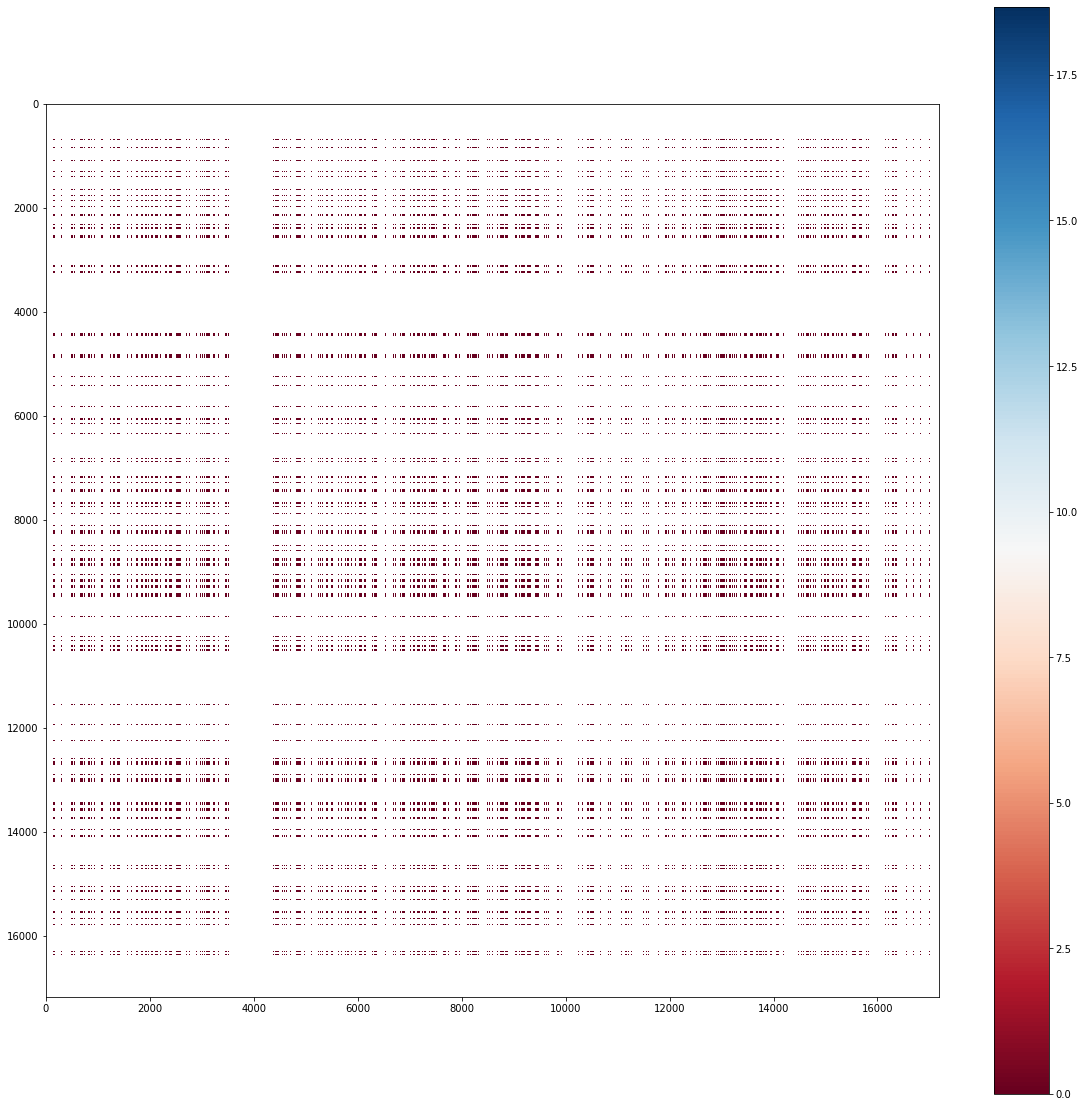

In [21]:
plt.figure(figsize = (20, 20))
plt.imshow(bal, cmap='RdBu')
plt.colorbar()

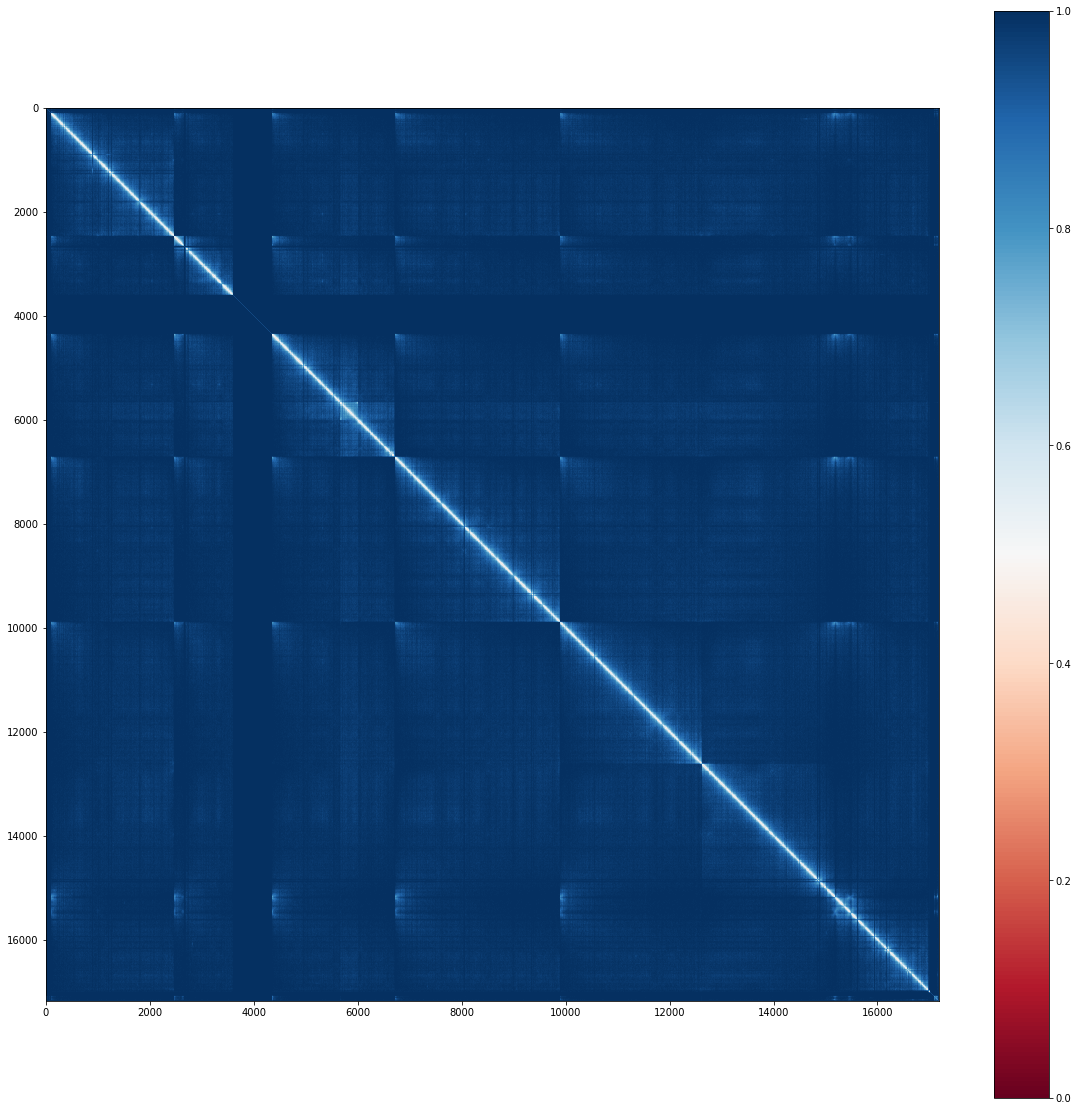

In [22]:
def mydist_balanced(B):
    B1 = np.where(np.isnan(B)==True, 0., B)
    B1 = np.where(B1==0.0, np.unique(B1)[1], B1) #no /2 division
    B1 = B1 / B1.max() if B1.max() > 1. else B1
    B1 = np.log10(B1)
    B1 = B1 * (-1)
    B1 = B1 / B1.max()
    np.fill_diagonal(B1, 0.)
    return B1
plt.figure(figsize = (20, 20))
plt.imshow(mydist_balanced(bal), cmap='RdBu')
plt.colorbar()


In [40]:
int(X.Vertices[0][1:-1].split(', ')[0])
int(X.Vertices[0][1:-1].split(', ')[-1])
def print_loop(matrix, df_homology, list_of_loops):
    plt.imshow(mydist_balanced(matrix), cmap='RdBu')
    for loop in list_of_loops:
        circle2 = plt.Circle((5, 5), 0.5, color='b', fill=False)


7

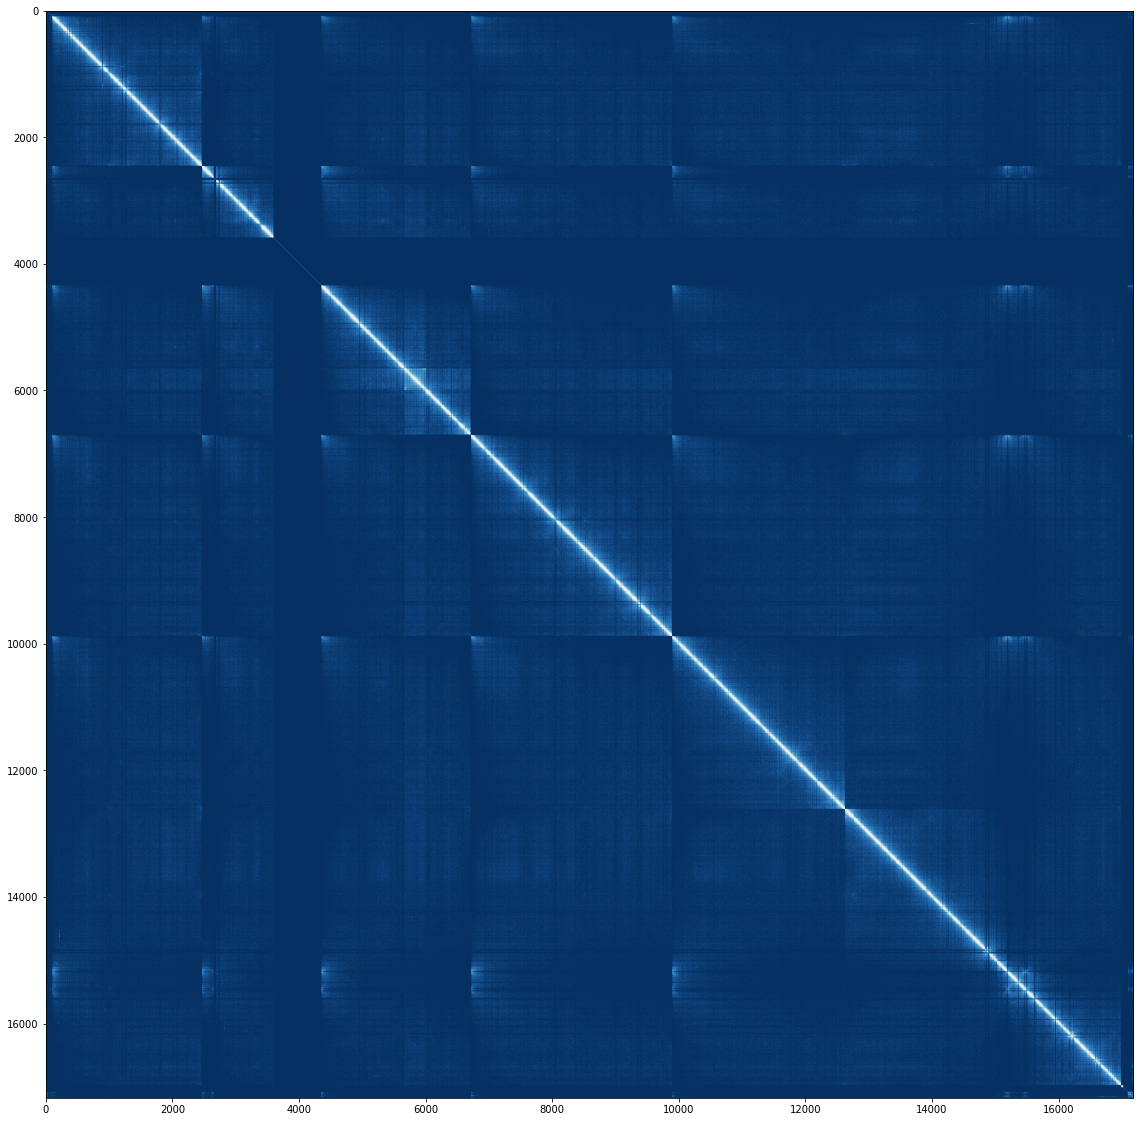

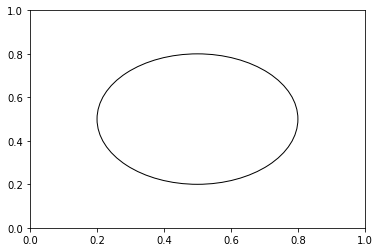

In [42]:
plt.figure(figsize = (20, 20))
plt.imshow(mydist_balanced(bal), cmap='RdBu')
figure, axes = plt.subplots()
draw_circle = plt.Circle((0.5, 0.5), 0.3,fill=False)

plt.gcf().gca().add_artist(draw_circle)
